<a href="https://colab.research.google.com/github/LazyRook01/NLP/blob/main/Classification%2BSentimentAnalysis_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Tokenization**

---
# **Setting Up NLTK**
---

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

---
# **Definitions**
---
**1. Corpus** - Body of text, singular. Corpora is the plural of this. Example: A collection of medical journals.

**2. Lexicon** - Words and their meanings. Example: English dictionary. Consider, however, that various fields will have different lexicons. For example: To a financial investor, the first meaning for the word "Bull" is someone who is confident about the market, as compared to the common English lexicon, where the first meaning for the word "Bull" is an animal. As such, there is a special lexicon for financial investors, doctors, children, mechanics, and so on.

**3. Token** - Each "entity" that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is "tokenized" into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.

---

---
# **Example 1**
---
An example of how one might actually tokenize something into tokens with the NLTK module

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

print(sent_tokenize(EXAMPLE_TEXT))

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]



---
At first, you may think tokenizing by things like words or sentences is a rather trivial enterprise. For many sentences it can be. The first step would be likely doing a simple .split('. '), or splitting by period followed by a space. Then maybe you would bring in some regular expressions to split by period, space, and then a capital letter. The problem is that things like Mr. Smith would cause you trouble, and many other things. Splitting by word is also a challenge, especially when considering things like concatenations like we and are to we're. NLTK is going to go ahead and just save you a ton of time with this seemingly simple, yet very complex, operation.

**The above code will output the sentences, split up into a list of sentences, which you can do things like iterate through with a for loop.**
['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]

**So there, we have created tokens, which are sentences.**

Let's tokenize by word instead this time:

---


In [3]:
print(word_tokenize(EXAMPLE_TEXT))

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


---
There are a few things to note here. First, notice that punctuation is treated as a separate token. Also, notice the separation of the word "shouldn't" into "should" and "n't." Finally, notice that "pinkish-blue" is indeed treated like the "one word" it was meant to be turned into.
***
Now, looking at these tokenized words, we have to begin thinking about what our next step might be. We start to ponder about how might we derive meaning by looking at these words. We can clearly think of ways to put value to many words, **but we also see a few words that are basically worthless. These are a form of "stop words,"** which we can also handle for. That is what we're going to be talking about in the next tutorial.
***

# 2. Stop Words

***
The idea of Natural Language Processing is to do some form of analysis, or processing, where the machine can understand, at least to some level, what the text means, says, or implies.
***
This is an obviously massive challenge, but there are steps to doing it that anyone can follow. The main idea, however, is that computers simply do not, and will not, ever understand words directly. Humans don't either *shocker*. In humans, memory is broken down into electrical signals in the brain, in the form of neural groups that fire in patterns. There is a lot about the brain that remains unknown, but, the more we break down the human brain to the basic elements, we find out basic the elements really are. Well, it turns out computers store information in a very similar way! We need a way to get as close to that as possible if we're going to mimic how humans read and understand text. Generally, computers use numbers for everything, but we often see directly in programming where we use binary signals (True or False, which directly translate to 1 or 0, which originates directly from either the presence of an electrical signal (True, 1), or not (False, 0)). To do this, we need a way to convert words to values, in numbers, or signal patterns. The process of converting data to something a computer can understand is referred to as "pre-processing." **One of the major forms of pre-processing is going to be filtering out useless data. In natural language processing, useless words (data), are referred to as stop words.**
***
Immediately, we can recognize ourselves that some words carry more meaning than other words. We can also see that some words are just plain useless, and are filler words. We use them in the English language, for example, to sort of "fluff" up the sentence so it is not so strange sounding. An example of one of the most common, unofficial, useless words is the phrase "umm." People stuff in "umm" frequently, some more than others. This word means nothing, unless of course we're searching for someone who is maybe lacking confidence, is confused, or hasn't practiced much speaking. We all do it, you can hear me saying "umm" or "uhh" in the videos plenty of ...uh ... times. For most analysis, these words are useless.
***
**We would not want these words taking up space in our database, or taking up valuable processing time. As such, we call these words "stop words" because they are useless, and we wish to do nothing with them. Another version of the term "stop words" can be more literal: Words we stop on.**
***
You can do this easily, by storing a list of words that you consider to be stop words. NLTK starts you off with a bunch of words that they consider to be stop words, you can access it via the NLTK corpus with:
***

In [4]:
# NLTK stopwords
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

***
Here is how you might incorporate using the stop_words set to remove the stop words from your text:
***

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


***
Another form of data pre-processing is 'stemming,' which is what we're going to be talking about next.
***

# 3. Stemming

***
The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.

The reason why we stem is to shorten the lookup, and normalize sentences.
***
Consider:

- I was taking a ride in the car.
- I was riding in the car.

This sentence means the same thing. in the car is the same. I was is the same. the ing denotes a clear past-tense in both cases, so is it truly necessary to differentiate between ride and riding, in the case of just trying to figure out the meaning of what this past-tense activity was?

No, not really.
***

This is just one minor example, but **imagine every word in the English language, every possible tense and affix you can put on a word. Having individual dictionary entries per version would be highly redundant and inefficient, especially since, once we convert to numbers, the "value" is going to be identical.**
***
One of the most popular stemming algorithms is the Porter stemmer, which has been around since 1979.
***
First, we're going to grab and define our stemmer:
***

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

***
Now, let's choose some words with a similar stem, like:
***

In [7]:
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

In [8]:
for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


***
Now let's try stemming a typical sentence, rather than some words:
***

In [9]:
new_text = "It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."

In [10]:
words = word_tokenize(new_text)

for w in words:
    print(ps.stem(w))

it
is
import
to
by
veri
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
at
least
onc
.


***
Next up, we're going to discuss something a bit more advanced from the NLTK module, Part of Speech tagging, where we can use the NLTK module to identify the parts of speech for each word in a sentence.
***

# 4. Part of Speech Tagging

***
One of the more powerful aspects of the NLTK module is the Part of Speech tagging that it can do for you. This means **labeling words in a sentence as nouns, adjectives, verbs...etc.** Even more impressive, it also labels by tense, and more. Here's a list of the tags, what they mean, and some examples:
***
```
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent\'s
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
```
***

***
How might we use this? While we're at it, we're going to cover a new sentence tokenizer, called the PunktSentenceTokenizer. This tokenizer is capable of unsupervised machine learning, so you can actually train it on any body of text that you use. First, let's get some imports out of the way that we're going to use:
***

In [11]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

***
Now, let's create our training and testing data:
***

In [12]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

***
One is a State of the Union address from 2005, and the other is from 2006 from past President George W. Bush.

Next, we can train the Punkt tokenizer like:
***

In [13]:
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

***
Then we can actually tokenize, using:
***

In [14]:
tokenized = custom_sent_tokenizer.tokenize(sample_text)

***
Now we can finish up this part of speech tagging script by creating a function that will run through and tag all of the parts of speech per sentence like so:
***

In [15]:
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))


process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

***
The output is a list of tuples, where the first element in the tuple is the word, and the second is the part of speech tag
***

***
At this point, we can begin to derive meaning, but there is still some work to do. The next topic that we're going to cover is chunking, which is where we group words, based on their parts of speech, into hopefully meaningful groups.
***

# 5. Chunking

***
Now that we know the parts of speech, we can do what is called **chunking, and group words into hopefully meaningful chunks. One of the main goals of chunking is to group into what are known as "noun phrases." These are phrases of one or more words that contain a noun, maybe some descriptive words, maybe a verb, and maybe something like an adverb. The idea is to group nouns with the words that are in relation to them.**
***
In order to chunk, we combine the part of speech tags with regular expressions. Mainly from regular expressions, we are going to utilize the following:
```
+ = match 1 or more
? = match 0 or 1 repetitions.
* = match 0 or MORE repetitions	  
. = Any character except a new line
```
***
The last things to note is that the part of speech tags are denoted with the "<" and ">" and we can also place regular expressions within the tags themselves, so account for things like "all nouns" (<N.*>)
***

In [16]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        with open('parse_tree.txt', 'w') as file:
            for i in tokenized:
                words = nltk.word_tokenize(i)
                tagged = nltk.pos_tag(words)
                chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
                chunkParser = nltk.RegexpParser(chunkGram)
                chunked = chunkParser.parse(tagged)
                file.write(str(chunked))
                file.write('\n\n')

    except Exception as e:
        print(str(e))

process_content()


***
The main line here in question is:
```
chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
```
This line, broken down:

<RB.?>* = "0 or more of any tense of adverb," followed by:

<VB.?>* = "0 or more of any tense of verb," followed by:

<NNP>+ = "One or more proper nouns," followed by

<NN>? = "zero or one singular noun."
***

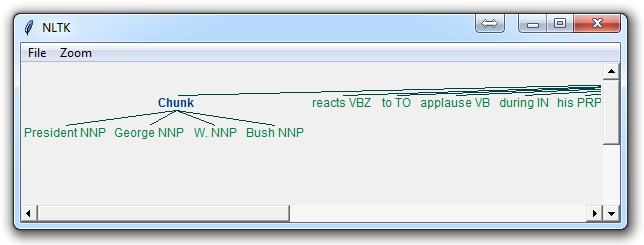

***
Well, what is happening here is our "chunked" variable is an NLTK tree. Each "chunk" and "non chunk" is a "subtree" of the tree. We can reference these by doing something like chunked.subtrees. We can then iterate through these subtrees like so:
***

In [17]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)

            print(chunked)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                print(subtree)

            chunked.draw()

    except Exception as e:
        print(str(e))

process_content()

(S
  (Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
  'S/POS
  (Chunk ADDRESS/NNP)
  BEFORE/IN
  (Chunk A/NNP JOINT/NNP SESSION/NNP)
  OF/IN
  (Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
  OF/IN
  (Chunk THE/NNP UNION/NNP January/NNP)
  31/CD
  ,/,
  2006/CD
  (Chunk THE/NNP PRESIDENT/NNP)
  :/:
  (Chunk Thank/NNP)
  you/PRP
  all/DT
  ./.)
(Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
(Chunk ADDRESS/NNP)
(Chunk A/NNP JOINT/NNP SESSION/NNP)
(Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
(Chunk THE/NNP UNION/NNP January/NNP)
(Chunk THE/NNP PRESIDENT/NNP)
(Chunk Thank/NNP)
no display name and no $DISPLAY environment variable


***
If you get particular enough, you may find that you may be better off if there was a way to chunk everything, except some stuff. This process is what is known as chinking, and that's what we're going to be covering next.
***

# 6. Chinking

You may find that, after a lot of chunking, you have some words in your chunk you still do not want, but you have no idea how to get rid of them by chunking. You may find that chinking is your solution.

Chinking is a lot like chunking, it is basically a way for you to remove a chunk from a chunk. The chunk that you remove from your chunk is your chink.

The code is very similar, you just denote the chink, after the chunk, with }{ instead of the chunk's {}.

In [18]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)

            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""

            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)

            chunked.draw()

    except Exception as e:
        print(str(e))

process_content()

no display name and no $DISPLAY environment variable


With this, you are given something like:

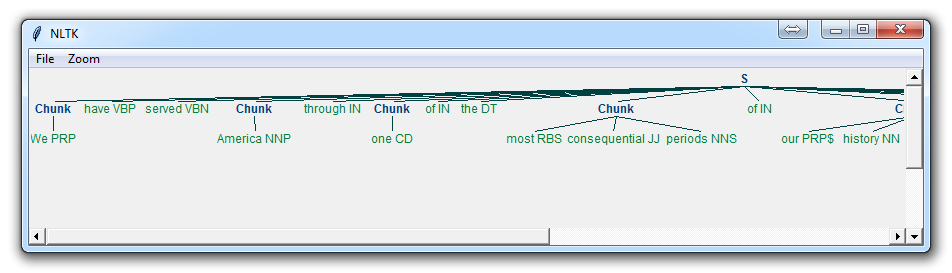

***
Now, the main difference here is:

}<VB.?|IN|DT|TO>+{
This means we're removing from the chink one or more verbs, prepositions, determiners, or the word 'to'.

Now that we've learned how to do some custom forms of chunking, and chinking, let's discuss a built-in form of chunking that comes with NLTK, and that is named entity recognition.
***

# 7. Named Entity Recognition

***
One of the most major forms of chunking in natural language processing is called **"Named Entity Recognition." The idea is to have the machine immediately be able to pull out "entities" like people, places, things, locations, monetary figures, and more.**
***
This can be a bit of a challenge, but NLTK is this built in for us. There are two major options with NLTK's named entity recognition: either recognize all named entities, or recognize named entities as their respective type, like people, places, locations, etc.
***
Here's an example:
***

In [19]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            namedEnt.draw()
    except Exception as e:
        print(str(e))


process_content()

no display name and no $DISPLAY environment variable


***
Here, with the option of binary = True, this means either something is a named entity, or not. There will be no further detail. The result is:
***
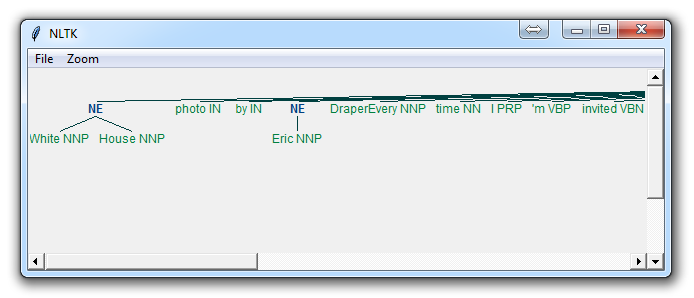
***
If you set binary = False, then the result is:
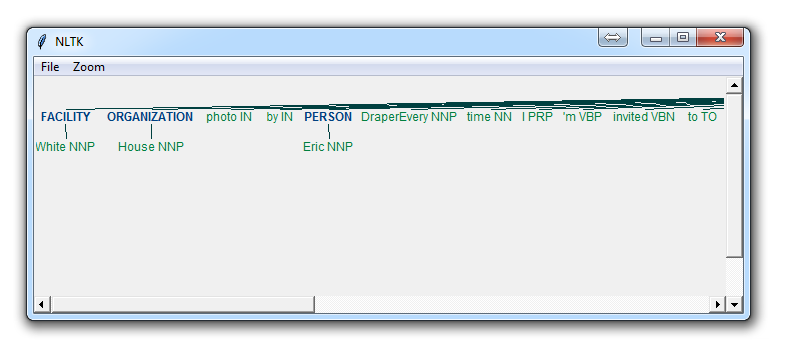
***

***
Immediately, you can see a few things. When Binary is False, it picked up the same things, but wound up splitting up terms like White House into "White" and "House" as if they were different, whereas we could see in the binary = True option, the named entity recognition was correct to say White House was part of the same named entity.
***
Depending on your goals, you may use the binary option how you see fit. Here are the types of Named Entities that you can get if you have binary as false:
```
NE Type and Examples
ORGANIZATION - Georgia-Pacific Corp., WHO
PERSON - Eddy Bonte, President Obama
LOCATION - Murray River, Mount Everest
DATE - June, 2008-06-29
TIME - two fifty a m, 1:30 p.m.
MONEY - 175 million Canadian Dollars, GBP 10.40
PERCENT - twenty pct, 18.75 %
FACILITY - Washington Monument, Stonehenge
GPE - South East Asia, Midlothian
```
***
Either way, you will probably find that you need to do a bit more work to get it just right, but this is pretty powerful right out of the box.
***
Next, we're going to talk about something similar to stemming, called lemmatizing.
***

# 8. Lemmatizing

***
A very similar operation to stemming is called lemmatizing. The major difference between these is, as you saw earlier, stemming can often create non-existent words, whereas lemmas are actual words.
***
So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.
***
Some times you will wind up with a very similar word, but sometimes, you will wind up with a completely different word. Let's see some examples.
***

In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

cat
cactus
goose
rock
python
good
best
run
run


***
Here, we've got a bunch of examples of the lemma for the words that we use. The only major thing to note is that lemmatize takes a part of speech parameter, "pos." If not supplied, the default is "noun." This means that an attempt will be made to find the closest noun, which can create trouble for you. Keep this in mind if you use lemmatizing!
***
Next, we're going to dive into the NTLK corpus that came with the module, looking at all of the awesome documents they have waiting for us there.
***

# 9 The corpora with NLTK

***
I want us to take a moment to peak into the corpora we all downloaded! The NLTK corpus is a massive dump of all kinds of natural language data sets that are definitely worth taking a look at.
***
Almost all of the files in the NLTK corpus follow the same rules for accessing them by using the NLTK module, but nothing is magical about them. These files are plain text files for the most part, some are XML and some are other formats, but they are all accessible by you manually, or via the module and Python. Let's talk about viewing them manually.
***
Depending on your installation, your nltk_data directory might be hiding in a multitude of locations. To figure out where it is, head to your Python directory, where the NLTK module is. If you do not know where that is, use the following code:
***

In [21]:
import nltk
print(nltk.__file__)

/usr/local/lib/python3.10/dist-packages/nltk/__init__.py


***
Run that, and the output will be the location of the NLTK module's __init__.py. Head into the NLTK directory, and then look for the data.py file.
***
The important blurb of code is:

In [24]:
import sys
if sys.platform.startswith('win'):
    # Common locations on Windows:
    path += [
        str(r'C:\nltk_data'), str(r'D:\nltk_data'), str(r'E:\nltk_data'),
        os.path.join(sys.prefix, str('nltk_data')),
        os.path.join(sys.prefix, str('lib'), str('nltk_data')),
        os.path.join(os.environ.get(str('APPDATA'), str('C:\\')), str('nltk_data'))
    ]
else:
    # Common locations on UNIX & OS X:
    path = [
        str('/usr/share/nltk_data'),
        str('/usr/local/share/nltk_data'),
        str('/usr/lib/nltk_data'),
        str('/usr/local/lib/nltk_data')
    ]

***
Now, we're going to talk about accessing these documents via NLTK. As you can see, these are mostly text documents, so you could just use normal Python code to open and read documents. That said, the NLTK module has a few nice methods for handling the corpus, so you may find it useful to use their methology. Here's an example of us opening the Gutenberg Bible, and reading the first few lines:
***

In [25]:
from nltk.tokenize import sent_tokenize, PunktSentenceTokenizer
from nltk.corpus import gutenberg

# sample text
sample = gutenberg.raw("bible-kjv.txt")

tok = sent_tokenize(sample)

for x in range(5):
    print(tok[x])

[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called Genesis


1:1 In the beginning God created the heaven and the earth.
1:2 And the earth was without form, and void; and darkness was upon
the face of the deep.
And the Spirit of God moved upon the face of the
waters.
1:3 And God said, Let there be light: and there was light.
1:4 And God saw the light, that it was good: and God divided the light
from the darkness.


***
One of the more advanced data sets in here is "wordnet." Wordnet is a collection of words, definitions, examples of their use, synonyms, antonyms, and more. We'll dive into using wordnet next.
***

# 10 . WordNet

***
WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.
***
You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more. Let's cover some examples.
***
First, you're going to need to import wordnet:

In [26]:
from nltk.corpus import wordnet

***
Then, we're going to use the term "program" to find synsets like so:
***

In [27]:
syns = wordnet.synsets("program")

***
An example of a synset:
***

In [28]:
print(syns[0].name())

plan.n.01


***
Just the word:
***

In [29]:
print(syns[0].lemmas()[0].name())

plan


***
Definition of that first synset:
***

In [30]:
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


***
Examples of the word in use:
***

In [31]:
print(syns[0].examples())

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


***
Next, how might we discern synonyms and antonyms to a word? The lemmas will be synonyms, and then you can use .antonyms to find the antonyms to the lemmas. As such, we can populate some lists like:
***

In [32]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'full', 'goodness', 'soundly', 'skilful', 'sound', 'dear', 'good', 'ripe', 'commodity', 'honest', 'undecomposed', 'secure', 'honorable', 'in_force', 'adept', 'thoroughly', 'near', 'respectable', 'effective', 'dependable', 'trade_good', 'proficient', 'expert', 'unspoilt', 'well', 'skillful', 'beneficial', 'right', 'salutary', 'serious', 'estimable', 'safe', 'in_effect', 'unspoiled', 'upright', 'just', 'practiced'}
{'ill', 'evil', 'bad', 'evilness', 'badness'}


***
As you can see, we got many more synonyms than antonyms, since we just looked up the antonym for the first lemma, but you could easily balance this buy also doing the exact same process for the term "bad."
***
Next, we can also easily use WordNet to compare the similarity of two words and their tenses, by incorporating the Wu and Palmer method for semantic related-ness.
***
Let's compare the noun of "ship" and "boat:"
***

In [33]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


In [34]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
print(w1.wup_similarity(w2))

0.6956521739130435


In [35]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('cat.n.01')
print(w1.wup_similarity(w2))

0.32


***
Next, we're going to pick things up a bit and begin to cover the topic of Text Classification.
***

# 11. Text Classification

***
Now that we're comfortable with NLTK, let's try to tackle text classification. The goal with text classification can be pretty broad. Maybe we're trying to classify text as about politics or the military. Maybe we're trying to classify it by the gender of the author who wrote it. A fairly popular text classification task is to identify a body of text as either spam or not spam, for things like email filters. In our case, we're going to try to create a **sentiment analysis algorithm.**
***
To do this, we're going to start by trying to use the movie reviews database that is part of the NLTK corpus. From there we'll try to use words as "features" which are a part of either a positive or negative movie review. The NLTK corpus movie_reviews data set has the reviews, and they are labeled already as positive or negative. This means we can train and test with this data. First, let's wrangle our data.
***

In [36]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

print(documents[1])

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print(all_words["stupid"])

(['inspired', 'by', 'the', '1958', 'film', 'house', 'on', 'haunted', 'hill', 'starring', 'vincent', 'price', '.', 'directed', 'by', 'william', 'malone', '.', 'starring', 'geoffrey', 'rush', ',', 'famke', 'janssen', ',', 'and', 'chris', 'kattan', '.', 'rated', 'r', '(', 'contains', 'violence', ',', 'profanity', ',', 'and', 'brief', 'nudity', ')', '.', 'synopsis', ':', 'eccentric', 'millionaire', 'price', 'offers', '$', '1', ',', '000', ',', '000', 'to', 'each', 'of', 'his', 'guests', 'who', 'appear', 'at', 'a', 'gathering', 'at', 'a', 'former', 'sanitarium', '.', 'the', 'only', 'catch', 'is', 'that', 'they', 'have', 'to', 'survive', 'the', 'night', 'at', 'the', 'establishment', ',', 'an', 'establishment', 'haunted', 'by', 'its', 'former', 'staff', 'and', 'patients', '.', 'comments', ':', 'house', 'on', 'haunted', 'hill', 'is', 'based', 'upon', 'the', 'original', '1958', 'film', 'of', 'the', 'same', 'title', 'directed', 'by', 'william', 'castle', 'and', 'starring', 'vincent', 'price', '.

***
It may take a moment to run this script, as the movie reviews dataset is somewhat large. Let's cover what is happening here.
***
After importing the data set we want, you see:
```
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
```
Basically, in plain English, the above code is translated to: In each category (we have pos or neg), take all of the file IDs (each review has its own ID), then store the word_tokenized version (a list of words) for the file ID, followed by the positive or negative label in one big list.
***
Next, we use random to shuffle our documents. This is because we're going to be training and testing. If we left them in order, chances are we'd train on all of the negatives, some positives, and then test only against positives. We don't want that, so we shuffle the data.
***
Then, just so you can see the data you are working with, we print out documents[1], which is a big list, where the first element is a list the words, and the 2nd element is the "pos" or "neg" label.
***
Next, we want to collect all words that we find, so we can have a massive list of typical words. From here, we can perform a frequency distribution, to then find out the most common words. As you will see, the most popular "words" are actually things like punctuation, "the," "a" and so on, but quickly we get to legitimate words. We intend to store a few thousand of the most popular words, so this shouldn't be a problem.
***
```
print(all_words.most_common(15))
```
The above gives you the 15 most common words. You can also find out how many occurences a word has by doing:
```
print(all_words["stupid"])
```
***
Next up, we'll begin storing our words as features of either positive or negative movie reviews.
***

# 12. Converting words to Features

***
Here, we're going to be building off the previous code and compiling feature lists of words from positive reviews and words from the negative reviews to hopefully see trends in specific types of words in positive or negative reviews.
***

In [37]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

***
Mostly the same as before, only with now a new variable, word_features, which contains the top 3,000 most common words. Next, we're going to build a quick function that will find these top 3,000 words in our positive and negative documents, marking their presence as either positive or negative:

***

In [38]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

***
Next, we can print one feature set like:
***

In [39]:
print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

***
Then we can do this for all of our documents, saving the feature existence booleans and their respective positive or negative categories by doing:
***

In [40]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

***
now that we have our features and labels, what is next? Typically the next step is to go ahead and train an algorithm, then test it. So, let's go ahead and do that, starting with the Naive Bayes classifier in the next tutorial!
***

# 13. Naive Bayes Classifier

***
Now it is time to choose an algorithm, separate our data into training and testing sets, and press go! The algorithm that we're going to use first is the Naive Bayes classifier. This is a pretty popular algorithm used in text classification, so it is only fitting that we try it out first. Before we can train and test our algorithm, however, we need to go ahead and split up the data into a training set and a testing set.
***
You could train and test on the same dataset, but this would present you with some serious bias issues, so you should never train and test against the exact same data. To do this, since we've shuffled our data set, we'll assign the first 1,900 shuffled reviews, consisting of both positive and negative reviews, as the training set. Then, we can test against the last 100 to see how accurate we are.
***
This is called supervised machine learning, because we're showing the machine data, and telling it "hey, this data is positive," or "this data is negative." Then, after that training is done, we show the machine some new data and ask the computer, based on what we taught the computer before, what the computer thinks the category of the new data is.
***
We can split the data with:
***

In [41]:
# set that we'll train our classifier with
training_set = featuresets[:1900]

# set that we'll test against.
testing_set = featuresets[1900:]

***
Next, we can define, and train our classifier like:
***

In [42]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

***
First we just simply are invoking the Naive Bayes classifier, then we go ahead and use .train() to train it all in one line.
***
Easy enough, now it is trained. Next, we can test it:
***

In [43]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 85.0


***
Boom, you have your answer. In case you missed it, the reason why we can "test" the data is because we still have the correct answers. So, in testing, we show the computer the data without giving it the correct answer. If it guesses correctly what we know the answer to be, then the computer got it right. Given the shuffling that we've done, you and me might come up with varying accuracy, but you should see something from 60-75% on average.
***
Next, we can take it a step further to see what the most valuable words are when it comes to positive or negative reviews:
***

In [44]:
classifier.show_most_informative_features(15)

Most Informative Features
               atrocious = True              neg : pos    =     11.8 : 1.0
                   sucks = True              neg : pos    =      9.9 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                  turkey = True              neg : pos    =      8.8 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
                 frances = True              pos : neg    =      7.6 : 1.0
                 idiotic = True              neg : pos    =      7.1 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
             silverstone = True              neg : pos    =      7.1 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
                 cunning = True              pos : neg    =      6.3 : 1.0
                obstacle = True              pos : neg    =      6.3 : 1.0
              schumacher = True              neg : pos    =      6.3 : 1.0

***
What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. So here, we can see that the term "insulting" appears 10.6 more times as often in negative reviews as it does in positive reviews. Ludicrous, 10.1.
***
Now, let's say you were totally content with your results, and you wanted to move forward, maybe using this classifier to predict things right now. It would be very impractical to train the classifier, and retrain it every time you needed to use it. As such, you can save the classifier using the pickle module. Let's do that next.
***

# 14. Saving Classifiers with NLTK

***
Training classifiers and machine learning algorithms can take a very long time, especially if you're training against a larger data set. Ours is actually pretty small. Can you imagine having to train the classifier every time you wanted to fire it up and use it? What horror! Instead, what we can do is use the Pickle module to go ahead and serialize our classifier object, so that all we need to do is load that file in real quick.
***
So, how do we do this? The first step is to save the object. To do this, first you need to import pickle at the top of your script, then, after you have trained with .train() the classifier, you can then call the following lines:
***

In [45]:
import pickle
save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

***
This opens up a pickle file, preparing to write in bytes some data. Then, we use pickle.dump() to dump the data. The first parameter to pickle.dump() is what are you dumping, the second parameter is where are you dumping it.
***
After that, we close the file as we're supposed to, and that is that, we now have a pickled, or serialized, object saved in our script's directory!
***
Next, how would we go about opening and using this classifier? The .pickle file is a serialized object, all we need to do now is read it into memory, which will be about as quick as reading any other ordinary file. To do this:
***

In [46]:
classifier_f = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

***
Here, we do a very similar process. We open the file to read as bytes. Then, we use pickle.load() to load the file, and we save the data to the classifier variable. Then we close the file, and that is that. We now have the same classifier object as before!
***
Now, we can use this object, and we no longer need to train our classifier every time we wanted to use it to classify.
***
While this is all fine and dandy, we're probably not too content with the 60-75% accuracy we're getting. What about other classifiers? Turns out, there are many classifiers, but we need the scikit-learn (sklearn) module. Luckily for us, the people at NLTK recognized the value of incorporating the sklearn module into NLTK, and they have built us a little API to do it. That's what we'll be doing in the next tutorial.
***

# 15. Scikit-Learn Sklearn with NLTK
***
We've seen by now how easy it can be to use classifiers out of the box, and now we want to try some more! The best module for Python to do this with is the Scikit-learn (sklearn) module.
***
If you would like to learn more about the Scikit-learn Module, I have some tutorials on machine learning with Scikit-Learn.
***
Luckily for us, the people behind NLTK forsaw the value of incorporating the sklearn module into the NLTK classifier methodology. As such, they created the SklearnClassifier API of sorts. To use that, you just need to import it like:
***

In [47]:
from nltk.classify.scikitlearn import SklearnClassifier

***
From here, you can use just about any of the sklearn classifiers. For example, lets bring in a couple more variations of the Naive Bayes algorithm:
***

In [48]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

***
With this, how might we use them? It turns out, this is very simple:
***

In [49]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MultinomialNB accuracy percent:",nltk.classify.accuracy(MNB_classifier, testing_set))

BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BernoulliNB accuracy percent:",nltk.classify.accuracy(BNB_classifier, testing_set))

MultinomialNB accuracy percent: 0.84
BernoulliNB accuracy percent: 0.86


***
It is as simple as that. Let's bring in some more:
***

In [50]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

***
Now, all of our classifiers should look something like:
***

In [51]:
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 85.0
Most Informative Features
               atrocious = True              neg : pos    =     11.8 : 1.0
                   sucks = True              neg : pos    =      9.9 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                  turkey = True              neg : pos    =      8.8 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
                 frances = True              pos : neg    =      7.6 : 1.0
                 idiotic = True              neg : pos    =      7.1 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
             silverstone = True              neg : pos    =      7.1 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
                 cunning = True              pos : neg    =      6.3 : 1.0
                obstacle = True              pos : neg    =      6.3 : 1.0
              schumacher 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy percent: 85.0
SGDClassifier_classifier accuracy percent: 84.0
SVC_classifier accuracy percent: 83.0
LinearSVC_classifier accuracy percent: 81.0
NuSVC_classifier accuracy percent: 84.0


***
So, we can see SVC is wrong more often than it is right right out of the gate, so we should probably dump that one. But then what? The next thing we can try is to use all of these algorithms at once. An algo of algos! To do this, we can create another classifier, and make the result of that classifier based on what the other algorithms said. Sort of like a voting system, so we'll just need an odd number of algorithms. That's what we'll be talking about in the next tutorial.
***

# 16. Combining Algorithms with NLTK

***
Now that we know how to use a bunch of algorithmic classifiers, like a child in the candy isle, told they can only pick one, we may find it difficult to choose just one classifier. The good news is, you don't have to! Combining classifier algorithms is is a common technique, done by creating a sort of voting system, where each algorithm gets one vote, and the classification that has the votes votes is the chosen one.
***
To do this, we want our new classifier to act like a typical NLTK classifier, with all of the methods. Simple enough, using object oriented programming, we can just be sure to inherit from the NLTK classifier class. To do this, we'll import it:
***

from nltk.classify import ClassifierI
from statistics import mode
We also import mode, as it will be our method for choosing the most popular vote.
***
Now, let's build our classifier class:
```
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
```
We're calling our class the VoteClassifier, and we're inheriting from NLTK's ClassifierI. Next, we're assigning the list of classifiers that are passed to our class to self._classifiers.
***
Next, we want to go ahead and create our own classify method. We want to call it classify, so that we can invoke .classify later on, like a traditional NLTK classifier would allow.
```
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
```
***
Easy enough, all we're doing here is iterating through our list of classifier objects. Then, for each one, we ask it to classify based on the features. The classification is being treated as a vote. After we are done iterating, we then return the mode(votes), which is just returning the most popular vote.
***
This is all we really need, but I think it would be useful to have another parameter, confidence. Since we have algorithms voting, we can also tally the votes for and against the winning vote, and call this "confidence." For example, 3/5 votes for positive is weaker than 5/5 votes. As such, we can literally return the ratio of votes as a sort of confidence indicator. Here's our confidence method:
```

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
```
Now, let's put everything together:

In [54]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode


class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

training_set = featuresets[:1900]
testing_set =  featuresets[1900:]

#classifier = nltk.NaiveBayesClassifier.train(training_set)

classifier_f = open("naivebayes.pickle","rb")
classifier = pickle.load(classifier_f)
classifier_f.close()




print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

##SVC_classifier = SklearnClassifier(SVC())
##SVC_classifier.train(training_set)
##print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


voted_classifier = VoteClassifier(classifier,
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

print("Classification:", voted_classifier.classify(testing_set[0][0]), "Confidence %:",voted_classifier.confidence(testing_set[0][0])*100)
print("Classification:", voted_classifier.classify(testing_set[1][0]), "Confidence %:",voted_classifier.confidence(testing_set[1][0])*100)
print("Classification:", voted_classifier.classify(testing_set[2][0]), "Confidence %:",voted_classifier.confidence(testing_set[2][0])*100)
print("Classification:", voted_classifier.classify(testing_set[3][0]), "Confidence %:",voted_classifier.confidence(testing_set[3][0])*100)
print("Classification:", voted_classifier.classify(testing_set[4][0]), "Confidence %:",voted_classifier.confidence(testing_set[4][0])*100)
print("Classification:", voted_classifier.classify(testing_set[5][0]), "Confidence %:",voted_classifier.confidence(testing_set[5][0])*100)

Original Naive Bayes Algo accuracy percent: 86.0
Most Informative Features
               atrocious = True              neg : pos    =     11.8 : 1.0
                   sucks = True              neg : pos    =      9.9 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                  turkey = True              neg : pos    =      8.8 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
                 frances = True              pos : neg    =      7.6 : 1.0
                 idiotic = True              neg : pos    =      7.1 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
             silverstone = True              neg : pos    =      7.1 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
                 cunning = True              pos : neg    =      6.3 : 1.0
                obstacle = True              pos : neg    =      6.3 : 1.0
              schumacher 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy percent: 81.0
SGDClassifier_classifier accuracy percent: 79.0
LinearSVC_classifier accuracy percent: 79.0
NuSVC_classifier accuracy percent: 81.0
voted_classifier accuracy percent: 84.0
Classification: neg Confidence %: 100.0
Classification: neg Confidence %: 100.0
Classification: pos Confidence %: 100.0
Classification: pos Confidence %: 57.14285714285714
Classification: pos Confidence %: 100.0
Classification: neg Confidence %: 100.0


# 17. Investigating bias

***
The most major issue is that we have a fairly biased algorithm. You can test this yourself by commenting-out the shuffling of the documents, then training against the first 1900, and leaving the last 100 (all positive) reviews. Test, and you will find you have very poor accuracy.
***
Conversely, you can test against the first 100 data sets, all negative, and train against the following 1900. You will find very high accuracy here. This is a bad sign. It could mean a lot of things, and there are many options for us to fix it.
***
That said, the project I have in mind for us suggests we go ahead and use a different data set anyways, so we will do that. In the end, we will find this new data set still contains some bias, and that is that it picks up negative things more often. The reason for this is that negative reviews tend to be "more negative" than positive reviews are positive. Handling this can be done with some simple weighting, but it can also get complex fast. Maybe a tutorial for another day. For now, we're going to just grab a new dataset, which we'll be discussing in the next tutorial.
***

# 18. Improving Training Data

***
So now it is time to train on a new data set. Our goal is to do Twitter sentiment, so we're hoping for a data set that is a bit shorter per positive and negative statement. It just so happens that I have a data set of 5300+ positive and 5300+ negative movie reviews, which are much shorter. These should give us a bit more accuracy from the larger training set, as well as be more fitting for tweets from Twitter.
***
I have hosted both files here, you can find them by going to the downloads for the short reviews. Save these files as positive.txt and negative.txt.
***
Now, we can build our new data set in a very similar way as before. What needs to change?
***
We need a new methodology for creating our "documents" variable, and then we also need a new way to create the "all_words" variable. No problem, really, here's how I did it:
***

In [56]:
!wget https://pythonprogramming.net/static/downloads/short_reviews/positive.txt
!wget https://pythonprogramming.net/static/downloads/short_reviews/negative.txt

--2023-11-20 19:51:56--  https://pythonprogramming.net/static/downloads/short_reviews/positive.txt
Resolving pythonprogramming.net (pythonprogramming.net)... 104.237.143.20, 2600:3c00::f03c:91ff:fe84:176d
Connecting to pythonprogramming.net (pythonprogramming.net)|104.237.143.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626168 (611K) [text/plain]
Saving to: ‘positive.txt’

positive.txt        100%[===================>] 611.49K  3.96MB/s    in 0.2s    

2023-11-20 19:51:57 (3.96 MB/s) - ‘positive.txt’ saved [626168/626168]

--2023-11-20 19:51:57--  https://pythonprogramming.net/static/downloads/short_reviews/negative.txt
Resolving pythonprogramming.net (pythonprogramming.net)... 104.237.143.20, 2600:3c00::f03c:91ff:fe84:176d
Connecting to pythonprogramming.net (pythonprogramming.net)|104.237.143.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 612290 (598K) [text/plain]
Saving to: ‘negative.txt’

negative.txt        100%[======

In [62]:
short_pos = open("positive.txt", encoding="latin-1").read()
short_neg = open("negative.txt", encoding="latin-1").read()


documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

***
Next, we also need to adjust our feature finding function, mainly tokenizing by word in the document, since we didn't have a nifty .words() feature for our new sample. I also went ahead and increased the most common words:
***

In [63]:
word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]
random.shuffle(featuresets)

***
Other than this, the rest is the same. Here's the full script just in case you or I missed something:
***
This process will take a while.. You may want to just go run some errands. It took me about 30-40 minutes to run it in full, and I am running an i7 3930k. For the typical processor in the year I am writing this (2015), it may be hours. This is a one and done process, however.
***

In [ ]:
%%time
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

from nltk.tokenize import word_tokenize


class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

short_pos = open("positive.txt", encoding="latin-1").read()
short_neg = open("negative.txt", encoding="latin-1").read()

documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

# positive data example:
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]

##
### negative data example:
##training_set = featuresets[100:]
##testing_set =  featuresets[:100]


classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

##SVC_classifier = SklearnClassifier(SVC())
##SVC_classifier.train(training_set)
##print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


voted_classifier = VoteClassifier(
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 77.10843373493977
Most Informative Features
               wonderful = True              pos : neg    =     19.8 : 1.0
              engrossing = True              pos : neg    =     18.5 : 1.0
               inventive = True              pos : neg    =     15.1 : 1.0
              refreshing = True              pos : neg    =     14.4 : 1.0
            refreshingly = True              pos : neg    =     12.4 : 1.0
                    warm = True              pos : neg    =     12.3 : 1.0
                powerful = True              pos : neg    =     12.2 : 1.0
               realistic = True              pos : neg    =     11.8 : 1.0
                touching = True              pos : neg    =     11.7 : 1.0
                provides = True              pos : neg    =     11.5 : 1.0
                    ages = True              pos : neg    =     11.1 : 1.0
                captures = True              pos : neg    =     11.1 : 1.0
            

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy percent: 77.2590361445783
SGDClassifier_classifier accuracy percent: 76.05421686746988
LinearSVC_classifier accuracy percent: 73.04216867469879


## Yeh waala dekhna padega

In [ ]:
%%time

import nltk
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, NuSVC
from nltk.classify import accuracy, ClassifierI
from statistics import mode
from concurrent.futures import ProcessPoolExecutor

short_pos = open("positive.txt", encoding="latin-1").read()
short_neg = open("negative.txt", encoding="latin-1").read()

documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

# positive data example:
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]

# Function to train a classifier
def train_classifier(classifier, training_set):
    return classifier.train(training_set)

# Train the classifiers in parallel
classifiers = [
    SklearnClassifier(MultinomialNB()),
    SklearnClassifier(BernoulliNB()),
    SklearnClassifier(LogisticRegression()),
    SklearnClassifier(SGDClassifier()),
    SklearnClassifier(LinearSVC()),
    SklearnClassifier(NuSVC())
]

with ProcessPoolExecutor() as executor:
    trained_classifiers = list(executor.map(train_classifier, classifiers, [training_set]*len(classifiers)))

# Evaluate and print accuracy
for i, classifier in enumerate(trained_classifiers):
    accuracy_percent = accuracy(classifier, testing_set) * 100
    print(f"{classifiers[i].__class__.__name__} accuracy percent: {accuracy_percent}")


In [ ]:
%%time

import nltk
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, NuSVC
from nltk.classify import accuracy, ClassifierI
from statistics import mode

# Assume you have already defined training_set and testing_set

# Train the classifiers with n_jobs parameter
classifiers = [
    SklearnClassifier(MultinomialNB(), n_jobs=-1),
    SklearnClassifier(BernoulliNB(), n_jobs=-1),
    SklearnClassifier(LogisticRegression(), n_jobs=-1),
    SklearnClassifier(SGDClassifier(), n_jobs=-1),
    SklearnClassifier(LinearSVC(), n_jobs=-1),
    SklearnClassifier(NuSVC(), n_jobs=-1)
]

# Train and print accuracy
for classifier in classifiers:
    classifier.train(training_set)
    accuracy_percent = accuracy(classifier, testing_set) * 100
    print(f"{classifier.__class__.__name__} accuracy percent: {accuracy_percent}")
